# Lab 3

In this lab exercise, you will look at applying an edge detector. We will use several functions from [scikit-image](https://scikit-image.org) to perform edge detection and visualisation. 

You are asked to write a short (no more than 2 pages) report of your work, answering specific questions, and showing example images. This work is not assessed (it will not count towards your module mark) but you will get formative feedback. 

### Task 1

Work your way through the script below. Using online documentation, understand how each function works, from edge detection, Hough Transform and line detection. Write a summary of how this algorithm works.

In [18]:
# Lab 3: Hough Transform

#This script is based off the following guide: https://scikit-image.org/docs/stable/auto_examples/edges/plot_line_hough_transform.html

# Importsx

from skimage import io
from matplotlib import pyplot as plt
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.color import rgb2gray
from skimage.feature import canny
from matplotlib import cm
import scipy
from scipy.linalg import sqrtm
from filters import gaussian_filter_3x3, gaussian_filter_5x5, sobel_x, sobel_y

rob_x = np.array([
    [1,0],
    [0,-1]
])

rob_y = np.array([
    [0,1],
    [-1,0]
])

prewitt_x = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

prewitt_y = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])


#Magnitude function

def magnitude(x,y):
    x_sqr = np.square(x)
    y_sqr = np.square(y)
    m = np.sqrt(x_sqr + y_sqr)
    return m


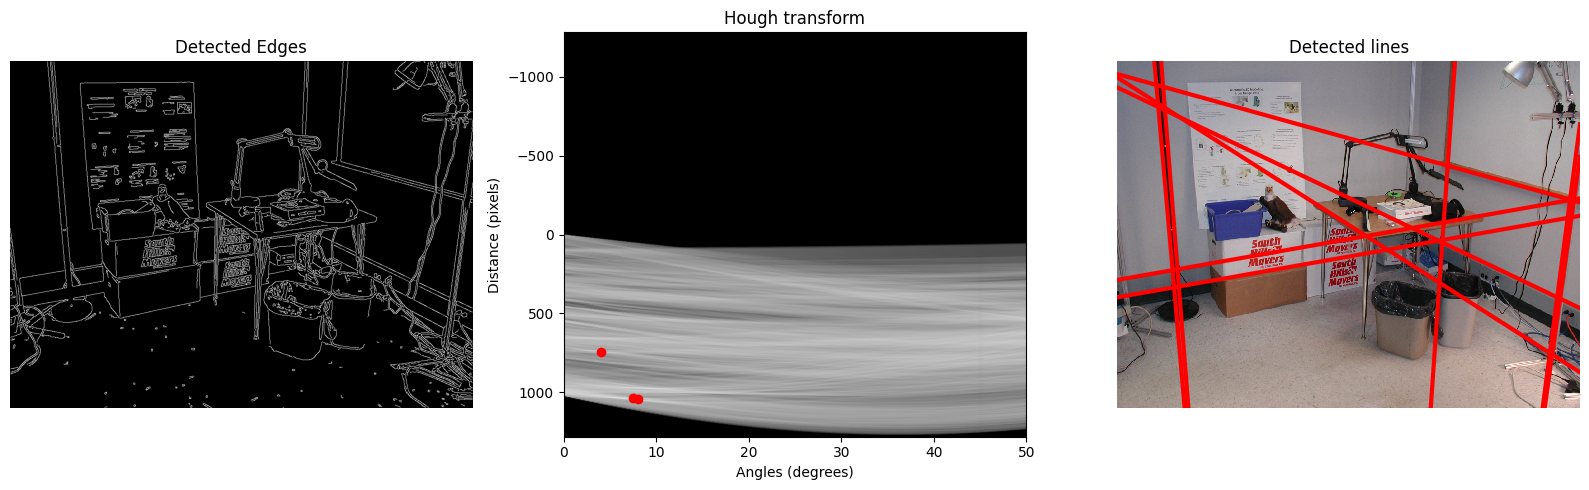

In [39]:
#Canny
## First we will read the image and find edges
# Read image

img = io.imread('cluttera2.jpg')
#img = io.imread('/Users/ocd/Desktop/shapes.jpg')


# The image is RGB and we need to convert to grayscale
img_grey = rgb2gray(img)

# Apply your favourite edge detector: Here I am using Built-in Canny

img_edges = canny(img_grey)

# Configure the figure
fig, axes = plt.subplots(1, 3,figsize=(16, 5))
ax = axes.ravel()

ax[0].imshow(img_edges, cmap=cm.gray)
ax[0].set_title('Detected Edges')
ax[0].set_axis_off()

# Classic straight-line Hough transform
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(img_edges, theta=tested_angles)

accum, angles, dists = hough_line_peaks(h,theta,d,threshold=1,num_peaks=10)

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

# Plot each of the lines on the hough transform
for i in range(0,len(angles)):
    ax[1].plot(np.rad2deg(angles[i]),dists[i],'ro')

ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray,aspect=0.1)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')

ax[1].axis('auto')
ax[1].set_xlim(0,50)

# Plot Figure 3: Detected Lines
for i in range(0,len(angles)):
    (x0, y0) = dists[i] * np.array([np.cos(angles[i]), np.sin(angles[i])])
    ax[2].axline((x0, y0),slope=np.tan(angles[i] + np.pi/2), color="red", linewidth=3)

ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

io.imshow(img)
plt.show()


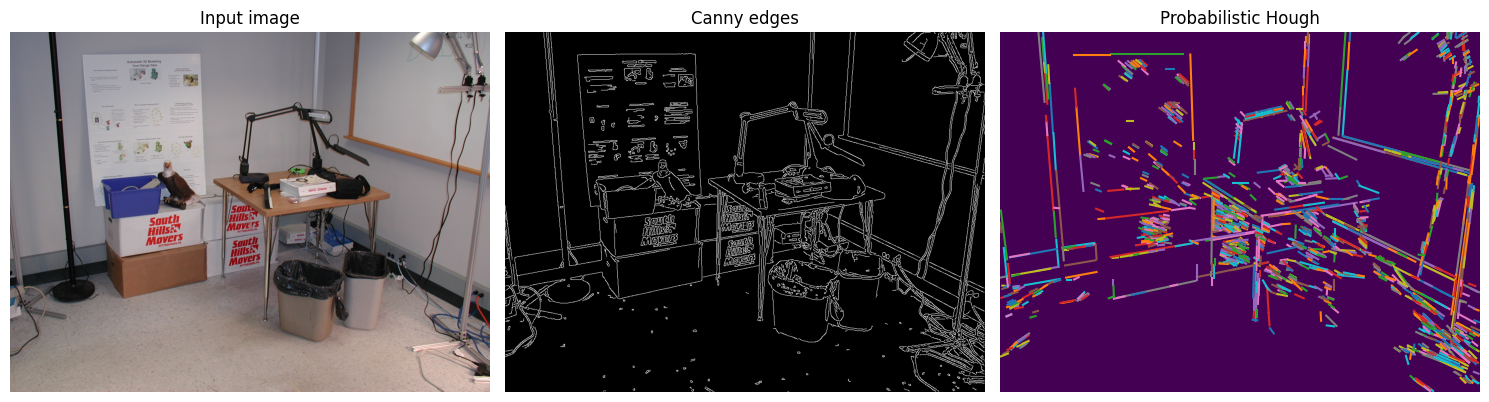

In [64]:
from skimage.transform import probabilistic_hough_line

# Line finding using the Probabilistic Hough Transform
lines = probabilistic_hough_line(img_edges, threshold=50, line_length=10,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(img_edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(img_edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, img.shape[1]))
ax[2].set_ylim((img.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

### Task 2
What is the effect of increasing/decreasing the required number of peaks in ‘houghpeaks’?


Increasing the number of peaks results in more lines detected


### Task 3 

Replace the Canny Edge detector with other algorithms. Which one do you think performs best and why?


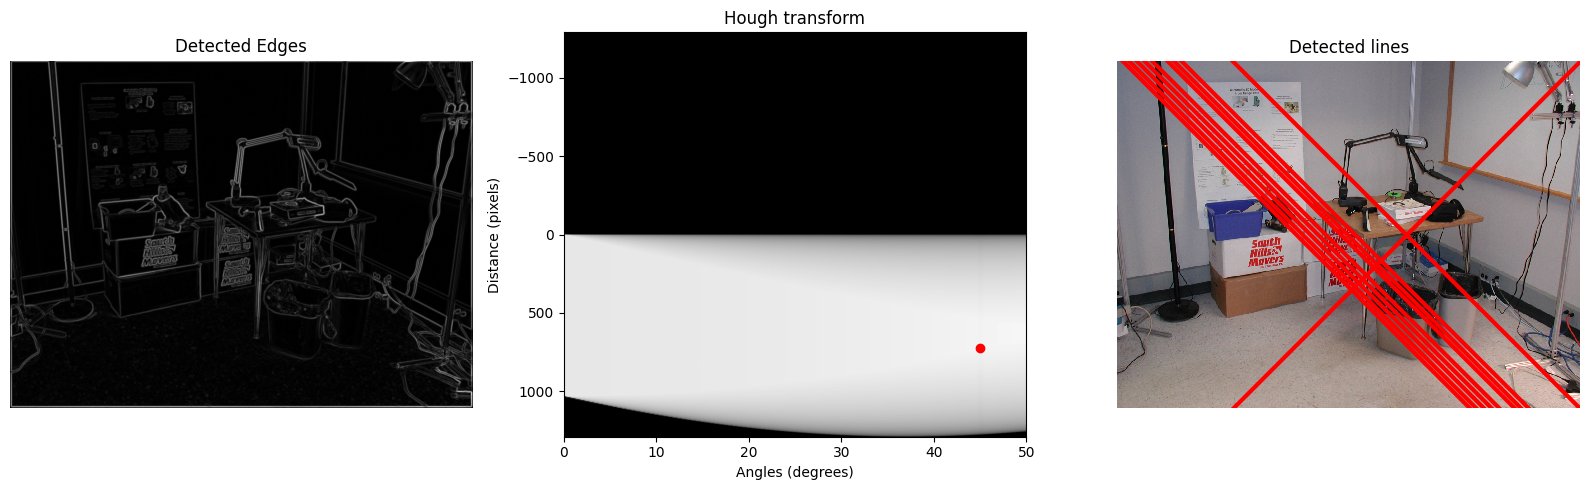

In [19]:
#Sobel
img_grey_gaussianed = scipy.signal.convolve2d(img_grey, gaussian_filter_5x5)

img_x_sobel= scipy.signal.convolve2d(img_grey_gaussianed, sobel_x)
img_y_sobel = scipy.signal.convolve2d(img_grey_gaussianed, sobel_y)
img_edges_sobel = magnitude(img_x_sobel,img_y_sobel)

# Configure the figure
fig, axes = plt.subplots(1, 3,figsize=(16, 5))
ax = axes.ravel()

ax[0].imshow(img_edges_sobel, cmap=cm.gray)
ax[0].set_title('Detected Edges')
ax[0].set_axis_off()

# Classic straight-line Hough transform
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(img_edges_sobel, theta=tested_angles)

accum, angles, dists = hough_line_peaks(h,theta,d,threshold=1,num_peaks=10)

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

# Plot each of the lines on the hough transform
for i in range(0,len(angles)):
    ax[1].plot(np.rad2deg(angles[i]),dists[i],'ro')

ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray,aspect=0.1)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')

ax[1].axis('auto')
ax[1].set_xlim(0,50)

# Plot Figure 3: Detected Lines
for i in range(0,len(angles)):
    (x0, y0) = dists[i] * np.array([np.cos(angles[i]), np.sin(angles[i])])
    ax[2].axline((x0, y0),slope=np.tan(angles[i] + np.pi/2), color="red", linewidth=3)

ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

io.imshow(img)
plt.show()


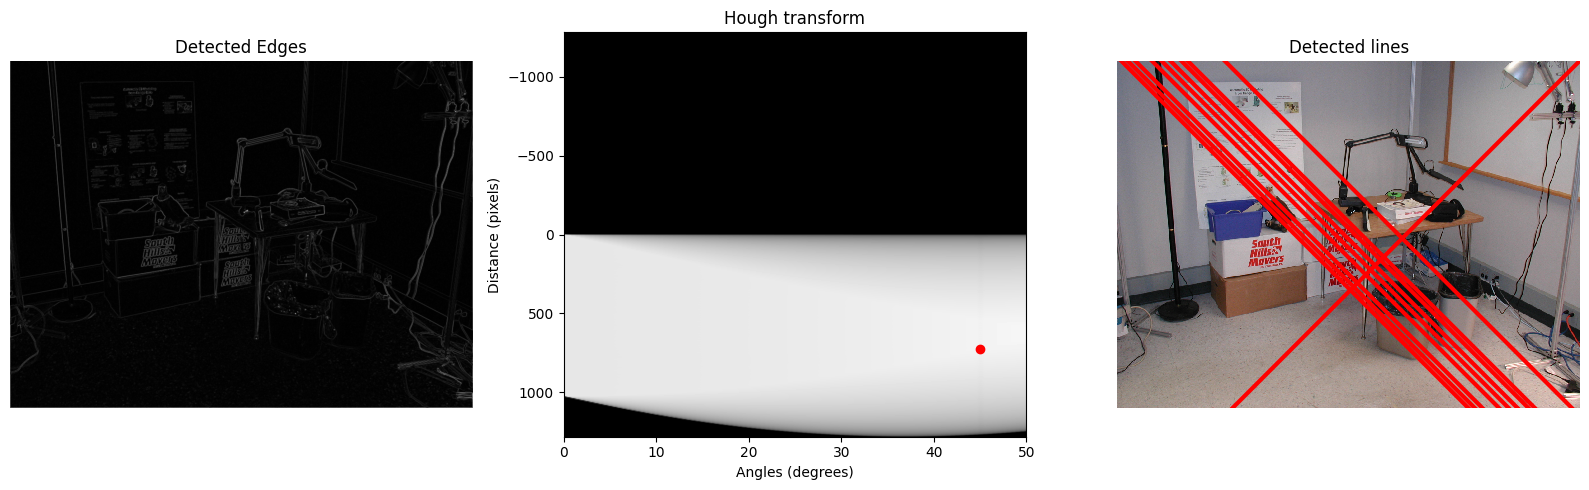

In [20]:
#Roberts
img_x_rob= scipy.signal.convolve2d(img_grey, rob_x)
img_y_rob = scipy.signal.convolve2d(img_grey, rob_y)
img_edges_robert = magnitude(img_x_rob,img_y_rob)

# Configure the figure
fig, axes = plt.subplots(1, 3,figsize=(16, 5))
ax = axes.ravel()

ax[0].imshow(img_edges_robert, cmap=cm.gray)
ax[0].set_title('Detected Edges')
ax[0].set_axis_off()

# Classic straight-line Hough transform
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(img_edges_robert, theta=tested_angles)

accum, angles, dists = hough_line_peaks(h,theta,d,threshold=1,num_peaks=10)

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

# Plot each of the lines on the hough transform
for i in range(0,len(angles)):
    ax[1].plot(np.rad2deg(angles[i]),dists[i],'ro')

ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray,aspect=0.1)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')

ax[1].axis('auto')
ax[1].set_xlim(0,50)

# Plot Figure 3: Detected Lines
for i in range(0,len(angles)):
    (x0, y0) = dists[i] * np.array([np.cos(angles[i]), np.sin(angles[i])])
    ax[2].axline((x0, y0),slope=np.tan(angles[i] + np.pi/2), color="red", linewidth=3)

ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

io.imshow(img)
plt.show()


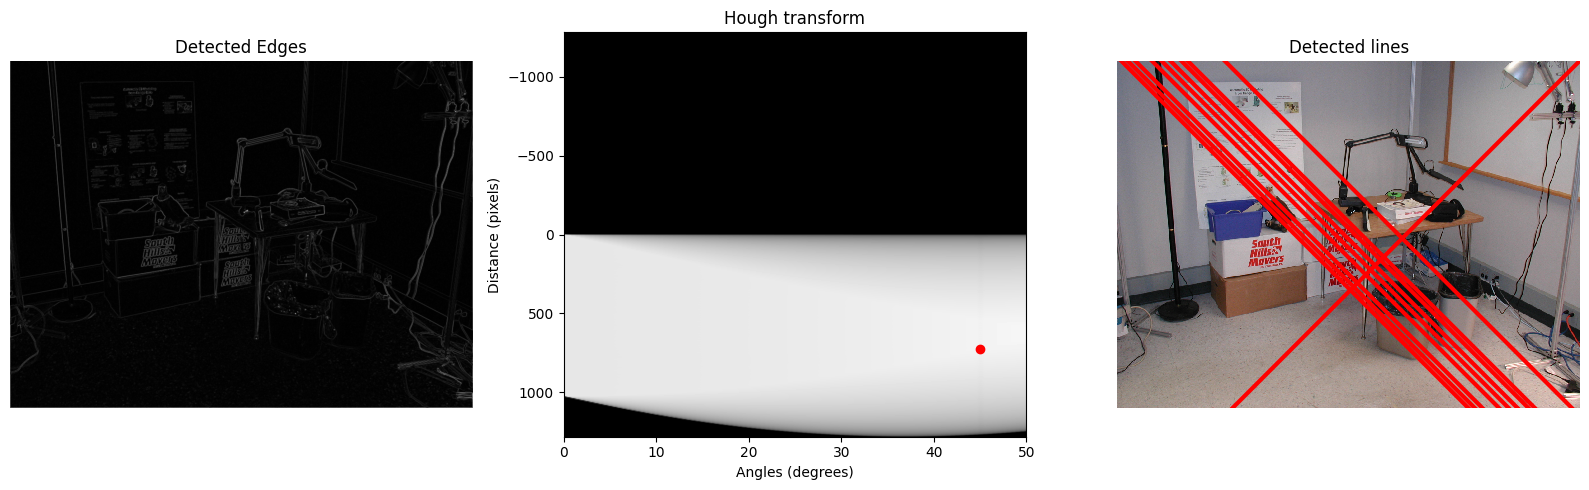

In [22]:
#Prewitt
img_x_prewitt= scipy.signal.convolve2d(img_grey, rob_x)
img_y_prewitt = scipy.signal.convolve2d(img_grey, rob_y)
img_edges_prewitt = magnitude(img_x_prewitt,img_y_prewitt)


# Configure the figure
fig, axes = plt.subplots(1, 3,figsize=(16, 5))
ax = axes.ravel()

ax[0].imshow(img_edges_prewitt, cmap=cm.gray)
ax[0].set_title('Detected Edges')
ax[0].set_axis_off()

# Classic straight-line Hough transform
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(img_edges_prewitt, theta=tested_angles)

accum, angles, dists = hough_line_peaks(h,theta,d,threshold=1,num_peaks=10)

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

# Plot each of the lines on the hough transform
for i in range(0,len(angles)):
    ax[1].plot(np.rad2deg(angles[i]),dists[i],'ro')

ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray,aspect=0.1)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')

ax[1].axis('auto')
ax[1].set_xlim(0,50)

# Plot Figure 3: Detected Lines
for i in range(0,len(angles)):
    (x0, y0) = dists[i] * np.array([np.cos(angles[i]), np.sin(angles[i])])
    ax[2].axline((x0, y0),slope=np.tan(angles[i] + np.pi/2), color="red", linewidth=3)

ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

io.imshow(img)
plt.show()



### Task 4

Examine the guide for Probabilistic Hough Transform: https://scikit-image.org/docs/stable/auto_examples/edges/plot_line_hough_transform.html#probabilistic-hough-transform. Apply probabilistic hough transform to the provided image. Describe in the report how this algorithm works, particularly when finding the start/finish of a line.

In [ ]:
#the objective of PHT is to minimise the proportion of points that are used in voting while maintaining false negative and false
#positive detection rates almost at the level achieved by the Standard HT